In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('authorized_judgeships_by_year.csv',parse_dates=True)
df.columns = ['Year','Judges']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    246 non-null    object
 1   Judges  253 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [4]:
df['Judges w/ temp'] = 1

In [5]:
#df.astype('int32',errors='ignore')
df = df.dropna()
df = df[~df['Year'].str.contains('Calendar')]
df = df[~df['Year'].str.contains('Year')]
df = df.reset_index(drop=True)


In [8]:
perm, temp = df.loc[231,'Judges'].split(',')
perm = perm.replace('(3)','').replace('(6)','')
temp = temp.replace('(3)','').replace('(6)','')
perm = int(perm.strip())
temp = int(temp.strip().replace('T',''))
perm,temp

(663, 10)

In [9]:
for i in range(len(df)):  
    entry = df.loc[i,'Judges'].split(',')

    if len(entry)==1:
        entry = entry[0].replace('(3)','').replace('(6)','')        
        df.loc[i,'Judges'] = int(entry)
        df.loc[i,'Judges w/ temp'] = int(entry)
    elif len(entry)==2:
        perm, temp = df.loc[i,'Judges'].split(',')
        perm = perm.replace('(3)','').replace('(6)','')
        temp = temp.replace('(3)','').replace('(6)','')
        perm = int(perm.strip())
        temp = int(temp.strip().replace('T',''))
        df.loc[i,'Judges']=perm
        df.loc[i,'Judges w/ temp']=perm+temp
df.head()

,Year,Judges,Judges w/ temp
0,1789,13,13
1,1790,15,15
2,1791,16,16
3,1792,16,16
4,1793,16,16


In [10]:
df.sample(8)

,Year,Judges,Judges w/ temp
138,1927,128,128
114,1903,73,73
61,1850,37,37
39,1828,27,27
44,1833,27,27
131,1920,97,97
54,1843,29,29
217,2006,663,674


In [11]:
df = df.astype('int64')
df.dtypes

#pd.to_datetime(df['Year'])

Year              int64
Judges            int64
Judges w/ temp    int64
dtype: object

In [14]:
df.to_csv('judges_by_year_clean.csv')

In [13]:
popul = pd.read_csv('US_population.csv', header=None,delimiter=r"\s+")
popul = popul.drop([0,1,4,5],axis=1)
#.astype('int64')
popul.columns = ['Year','Population']
popul.Population = popul.Population.str.replace(',','')
popul = popul.astype('int64')
popul.head()

,Year,Population
0,1999,272690813
1,1998,270248003
2,1997,267783607
3,1996,265228572
4,1995,262803276


In [17]:
pop_file = popul.to_csv('US_population_clean.csv')

In [14]:
popul.dtypes

Year          int64
Population    int64
dtype: object

In [15]:
df = df.merge(popul, how='left',on='Year')


Start over with all data in one file.

In [18]:
df = pd.read_csv('all_data_clean.csv')

In [20]:
df = df.drop('Unnamed: 0',axis=1)
df

,Year,Judges,Judges w/ temp,Real GDP,Population
0,1789,13,13,NaN,NaN
1,1790,15,15,NaN,NaN
2,1791,16,16,NaN,NaN
3,1792,16,16,NaN,NaN
4,1793,16,16,NaN,NaN
...,...,...,...,...,...
227,2016,663,673,17730.509,323161011.0
228,2017,663,673,18144.105,324985539.0
229,2018,663,673,18687.786,326687501.0
230,2019,663,673,19091.662,328239523.0


In [37]:
df['Judges per capita']= (df['Judges']/df['Population'])*10000000

In [48]:
for i in range(len(df)):
    if df.loc[i,'Year']>=1799:
        df.loc[i,'Judges added in 10 years']=df.loc[i,'Judges']-df.loc[i-10,'Judges']
    else:
        df.loc[i,'Judges added in 10 years']=0

In [38]:
df_notnull=df[~df['Judges per capita'].isnull()]


In [39]:
df_notnull.head()

,Year,Judges,Judges w/ temp,Real GDP,Population,Judges per capita
111,1900,67,67,NaN,76094000.0,8.804899
112,1901,70,70,NaN,77584000.0,9.022479
113,1902,71,71,NaN,79163000.0,8.968836
114,1903,73,73,NaN,80632000.0,9.053478
115,1904,74,74,NaN,82166000.0,9.006158


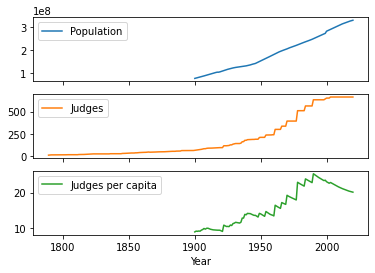

In [40]:
df.plot('Year',['Population','Judges','Judges per capita'],subplots=True)

plt.show()

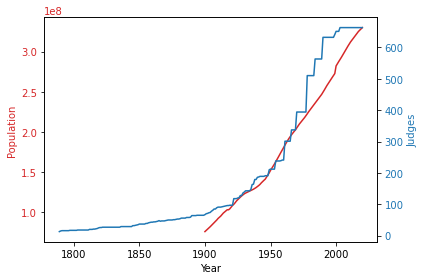

In [42]:
year = df['Year']
pop = df['Population']
judges = df['Judges']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Judges', color=color)  # we already handled the x-label with ax1
ax2.plot(year, judges, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Federal District Court Judges have been added throughout the 20th century to keep pace with population. In 2003, this trend stopped, and no new judges have been added since then.

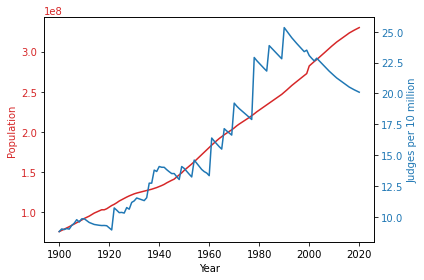

In [52]:
year = df['Year']
pop = df['Population']
judges_per = df['Judges per capita']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Judges per 10 million', color=color)  # we already handled the x-label with ax1
ax2.plot(year, judges_per, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Throughout the 20th century, the number of judges per 10 million citizens has risen. Since 1990, judges per 10 million citizens has fallen. In 1990, that number was about 25. Now it is 20, a number last seen in about 1980.

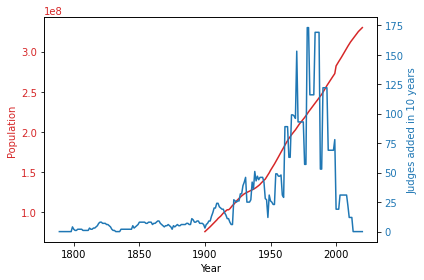

In [51]:
year = df['Year']
pop = df['Population']
judges_in_10 = df['Judges added in 10 years']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Judges added in 10 years', color=color)  # we already handled the x-label with ax1
ax2.plot(year, judges_in_10, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The rate of creating new judgeships has been falling precipitously since about 1980. It has now fallen to zero, since no new judgeships have been created since 2003. Even in the 19th century, small non-zero numbers of judges were appointed when the population of the U.S. was less than a quarter of what it is today. 